# EDA on Lending Club Case Study

**Data Description:** The Data contains the complete loan data for all loans issued through the time period 2007 to 2011. And  the data dictionary which describes the meaning of these variables.

**Business Problem**:

Identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.


**EDA Approach**:

Approach on the EDA on this case study:

Inline **Insights** are made

**1. Understanding the Data**
   - Import/Load the Data
   - Data info
   - Columns and thier data types
   - Numeric vs Categorical Columns
   - Sanity check

**2. Data Quality & Fix**
   - Check and Drop null values
   - delete irrelevant features
   - type cast cat variables
   - Handling outliers

**3. Data Content Analysis**
   - Univariate Analysis
       - Numerical values analysis
       - Categorical values analysis
   - Correlation b/w features
   - Bivariate Analysis

**4. Summary of EDA**

**5. Conclusion**


In [1]:
#Importing the needed Liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import warnings
warnings.filterwarnings("ignore") #Suppress the Future Warnings for a cleaner representation 
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization

********************************************************************************************************************************



### **1. Understanding the Data**
   - Import/Load the Data
   - Data info
   - Columns and thier data types
   - Numeric vs Categorical Columns
   - Sanity check

In [2]:
#Import/Load the Data
loans = pd.read_csv("loan.csv")
#Limiting the floating point variables to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#A quick look into the data
loans.head(3).append(loans.tail(3))

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
39714   36 months    8.07%       156.84     A        A4  ...   
39715   36 months    7.43%       155.38     A        A2  ...   
39716   36 months   13.75%       255.43     E        E2  ...   

      num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                    NaN                NaN            NaN               NaN   
1                    NaN                NaN            NaN               NaN   
2                    NaN                NaN            NaN               NaN   
39714                NaN                NaN            NaN               NaN   
39715                NaN                NaN            NaN               NaN   
39716                NaN                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                     0.00      0.00             NaN               NaN   
1                     0.00      0.00             NaN               NaN   
2                     0.00      0.00             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
0                NaN                        NaN  
1                NaN                        NaN  
2                NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[6 rows x 111 columns]

In [3]:
# Data info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Check Categorical and Numerical variables
pd.value_counts(loans.dtypes)

float64    74
object     24
int64      13
dtype: int64

In [5]:
# See all the columns that contain categorical data
loan_cat_columns = list(loans.select_dtypes(include="object"))
print (loan_cat_columns) # print categorical columns

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [6]:
# See Missing values and Unique values
print ("\nMissing values:", loans.isnull().sum().values.sum())
print ("\nUnique values:\n",loans.nunique())


Missing values: 2263364

Unique values:
 id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [7]:
#Sanity check of loan_status
loans.loan_status.value_counts()
loans.shape

(39717, 111)

### Visual analysis of the loan_status

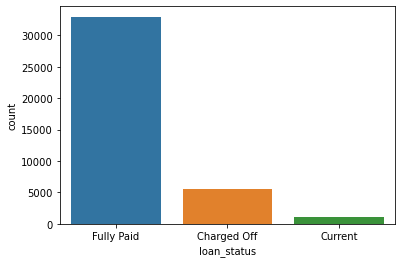

In [8]:
sns.countplot(loans.loan_status);

In [9]:
#labels
lable = loans["loan_status"].value_counts().keys().tolist()
#values
value = loans["loan_status"].value_counts().values.tolist()

trace = go.Pie(labels = lable ,
               values = value ,
               marker = dict(colors =  [ 'green' ,'red', 'blue'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Loan Status Fully Paid vs Default vs Current",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

### Insights:

1. There are 111 columns
2. There are many columns with Null values and repeating values and have to be removed for analysis
3. There are 24 object/categorical types, of which few might have to be type casted for analysis. Example: term, int_rate
4. No missing values in the Target variable **loan_status**

********************************************************************************************************************************



### **2. Data Quality & Fix**
   - Check and Drop null values
   - delete irrelevant features
   - type cast cat variables
   - Handling outliers
   - Date, Time formatting

#### Check and Drop Null

In [10]:
print ("Shape before cleaning the data:", loans.shape)
# Drop if all values are NA, drop that column.
loans_1 =loans.dropna(axis=1,how='all')
print ("Shape after dropping all NA columns:", loans_1.shape)

Shape before cleaning the data: (39717, 111)
Shape after dropping all NA columns: (39717, 57)


#### Delete irrelevant Columns

Dropping columns which have the same value in all the rows and dropping a few columns that have data that are of no interest for the analysis.

Below columns have the same data and we cannot infer any info for this EDA from them

In [11]:
loans_1 = loans_1.drop(['application_type', 'emp_title','collections_12_mths_ex_med', 'desc', 'next_pymnt_d', 'policy_code', 
                        'pymnt_plan', 'title', 'url','initial_list_status'],axis=1)

# Below columns are Customer behaviour variables and will not be available @ the time of loan application
# Hence these cannot be used for our EDA
loans_1 = loans_1.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                        'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],axis=1)
print ("Shape after dropping columns of not interest:", loans_1.shape)

Shape after dropping columns of not interest: (39717, 27)


#### Dropping **rows** that are not of interest in the analysis. 
The loan_status 'current' cannot be included for the analysis, as the loan is in progress & No inference can be made out of the Current loan_status

In [12]:
loans_1 = loans_1.drop(loans_1[loans_1['loan_status'] == "Current"].index)
print ("Shape after dropping all not applicable rows:", loans_1.shape)

Shape after dropping all not applicable rows: (38577, 27)


#### Deleting columns with more missing data

Visualisation of the missing data

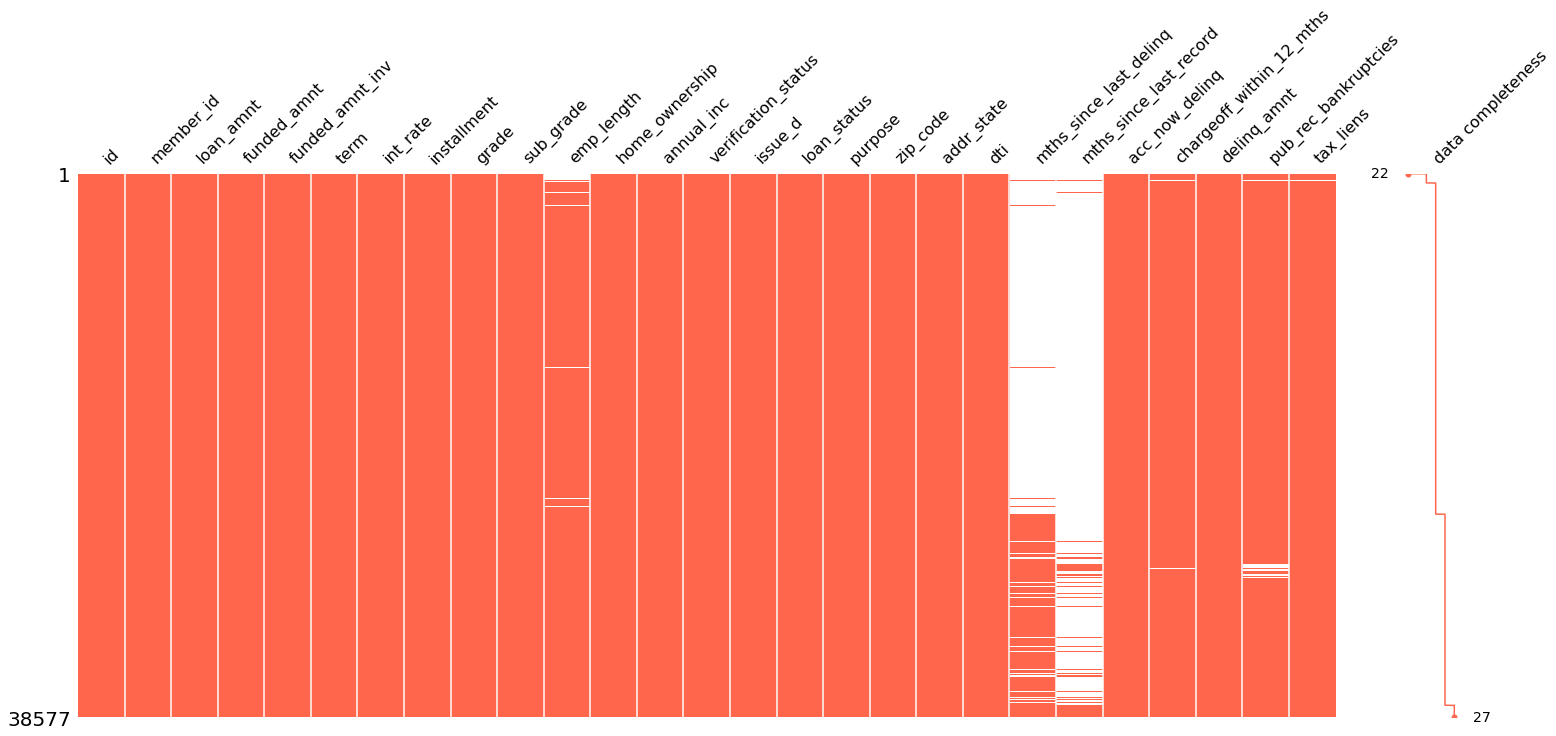

In [13]:
import missingno as msno
%matplotlib inline
msno.matrix(loans_1, labels=True, sort="ascending", color=(1, 0.4, 0.3));

In [14]:
# columns with more than 50 % missing data
missing_columns = loans_1.columns[100*(loans_1.isnull().sum()/len(loans_1.index)) > 50]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 2
Index(['mths_since_last_delinq', 'mths_since_last_record'], dtype='object')


In [15]:
# Delete the columns that miss more than 50% of values
loans_1 = loans_1.drop(missing_columns, axis=1)
print(loans_1.shape)
print ("Shape after dropping Columns that miss more than 50% data:", loans_1.shape)

(38577, 25)
Shape after dropping Columns that miss more than 50% data: (38577, 25)


Visualisation of missing data after cleaning

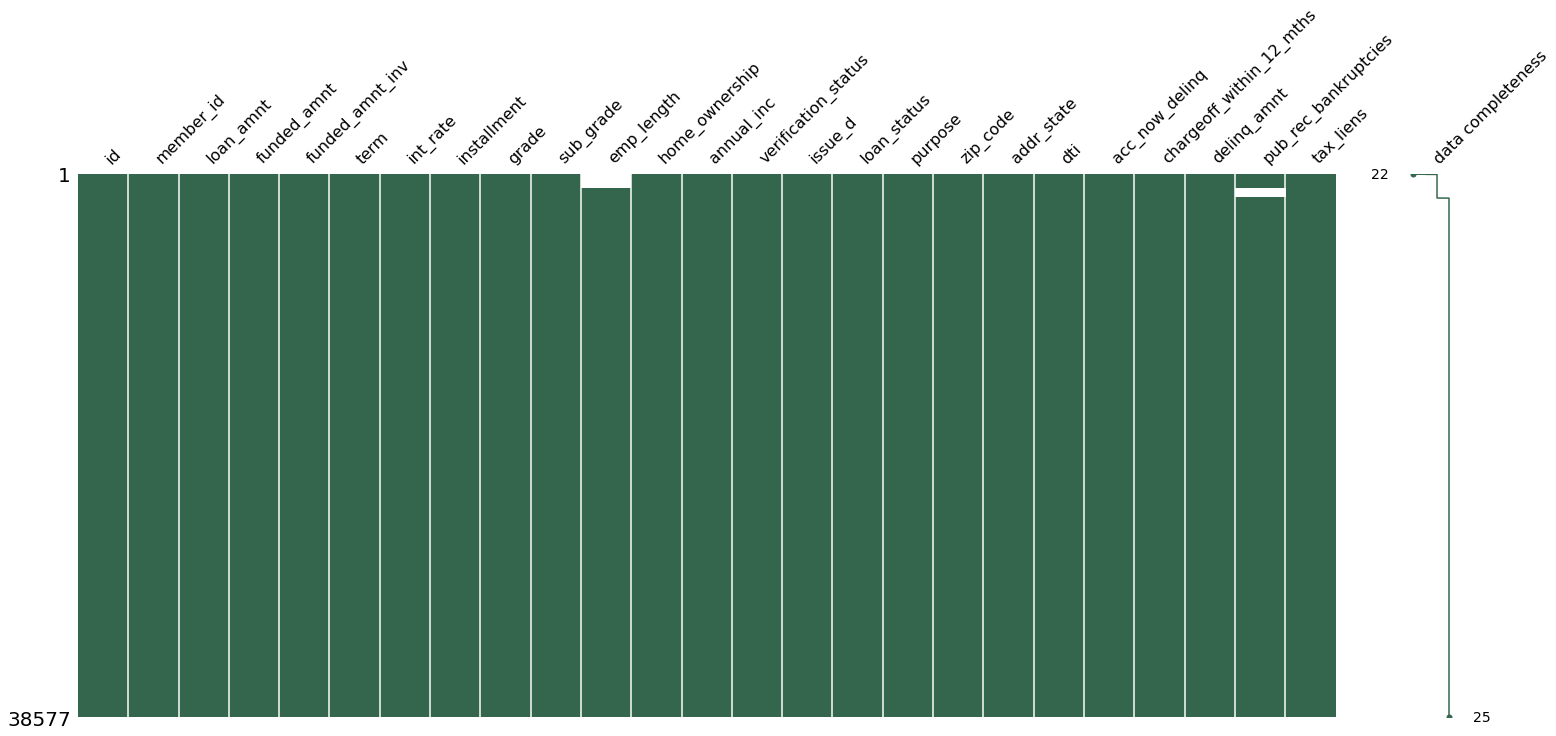

In [16]:
%matplotlib inline
msno.matrix(loans_1, labels=True, sort="ascending", color=(0.2, 0.4, 0.3));

#### Type casting Cat variables where needed

In [17]:
# Columns that contain categorical data
loan_cat_columns = list(loans_1.select_dtypes(include="object"))
loan_cat_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state']

Understand the unique values and derive the variables that needs to be type casted

In [18]:
loans_1[loan_cat_columns].describe()

term int_rate  grade sub_grade emp_length home_ownership  \
count        38577    38577  38577     38577      37544          38577   
unique           2      370      7        35         11              5   
top      36 months   10.99%      B        A4  10+ years           RENT   
freq         29096      913  11675      2873       8488          18480   

       verification_status issue_d loan_status             purpose zip_code  \
count                38577   38577       38577               38577    38577   
unique                   3      55           2                  14      822   
top           Not Verified  Nov-11  Fully Paid  debt_consolidation    100xx   
freq                 16694    2062       32950               18055      583   

       addr_state  
count       38577  
unique         50  
top            CA  
freq         6949

term has only 2 unique values and can be left as it is

int_rate, emp_length, issue_d shall be converted to float or int as needed

Type casting int_rate to float

In [19]:
# Remove the % symbol from the text
loans_1['int_rate'] = loans_1["int_rate"].str.replace("%","")
# type cast to float
loans_1['int_rate'] = loans_1['int_rate'].astype('float')

Type casting emp_length

In [20]:
## Better way can be used. This code is Ugly!!!
loans_1['emp_length'] = loans_1["emp_length"].str.replace(" year","")
loans_1['emp_length'] = loans_1["emp_length"].str.replace("< ","")
loans_1['emp_length'] = loans_1["emp_length"].str.replace("s","")
loans_1['emp_length'] = loans_1["emp_length"].str.replace("+","")
# type cast to int
loans_1['emp_length'] = loans_1['emp_length'].fillna(0)
loans_1['emp_length'] = loans_1['emp_length'].astype('int32')
#loans_1['emp_length']=loans_1.emp_length.str.extract('(\d+)')

#### Handling Outliers

Understand the numerical columns

In [21]:
# Columns that contain numerial data
loan_num_columns = list(loans_1.select_dtypes(include = "number"))
loans_1[loan_num_columns].describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   38577.00   38577.00   38577.00     38577.00         38577.00   
mean   676378.71  842284.34   11047.03     10784.06         10222.48   
std    209263.90  264451.93    7348.44      7090.31          7022.72   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    512033.00  661131.00    5300.00      5200.00          5000.00   
50%    656423.00  839292.00    9600.00      9550.00          8733.44   
75%    829146.00 1037336.00   15000.00     15000.00         14000.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       int_rate  installment  emp_length  annual_inc      dti  acc_now_delinq  \
count  38577.00     38577.00    38577.00    38577.00 38577.00        38577.00   
mean      11.93       322.47        4.93    68777.97    13.27            0.00   
std        3.69       208.64        3.45    64218.68     6.67            0.00   
min        5.42        15.69        0.00     4000.00     0.00            0.00   
25%        8.94       165.74        2.00    40000.00     8.13            0.00   
50%       11.71       277.86        4.00    58868.00    13.37            0.00   
75%       14.38       425.55        9.00    82000.00    18.56            0.00   
max       24.40      1305.19       10.00  6000000.00    29.99            0.00   

       chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
count                  38521.00     38577.00              37880.00   38538.00  
mean                       0.00         0.00                  0.04       0.00  
std                        0.00         0.00                  0.20       0.00  
min                        0.00         0.00                  0.00       0.00  
25%                        0.00         0.00                  0.00       0.00  
50%                        0.00         0.00                  0.00       0.00  
75%                        0.00         0.00                  0.00       0.00  
max                        0.00         0.00                  2.00       0.00

In [22]:
print (loans_1.pub_rec_bankruptcies.value_counts())

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64


member_id, id has only unique values and one can be dropped

acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens only has 0 as values and can be dropped

pub_rec_bankruptcies has predominantly 0 as values and can be dropped

In [23]:
loans_1 = loans_1.drop(['member_id', 'id','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'pub_rec_bankruptcies'],axis=1)

In [24]:
loan_num_columns = list(loans_1.select_dtypes(include = "number"))
loans_1[loan_num_columns].describe()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
count   38577.00     38577.00         38577.00  38577.00     38577.00   
mean    11047.03     10784.06         10222.48     11.93       322.47   
std      7348.44      7090.31          7022.72      3.69       208.64   
min       500.00       500.00             0.00      5.42        15.69   
25%      5300.00      5200.00          5000.00      8.94       165.74   
50%      9600.00      9550.00          8733.44     11.71       277.86   
75%     15000.00     15000.00         14000.00     14.38       425.55   
max     35000.00     35000.00         35000.00     24.40      1305.19   

       emp_length  annual_inc      dti  
count    38577.00    38577.00 38577.00  
mean         4.93    68777.97    13.27  
std          3.45    64218.68     6.67  
min          0.00     4000.00     0.00  
25%          2.00    40000.00     8.13  
50%          4.00    58868.00    13.37  
75%          9.00    82000.00    18.56  
max         10.00  6000000.00    29.99

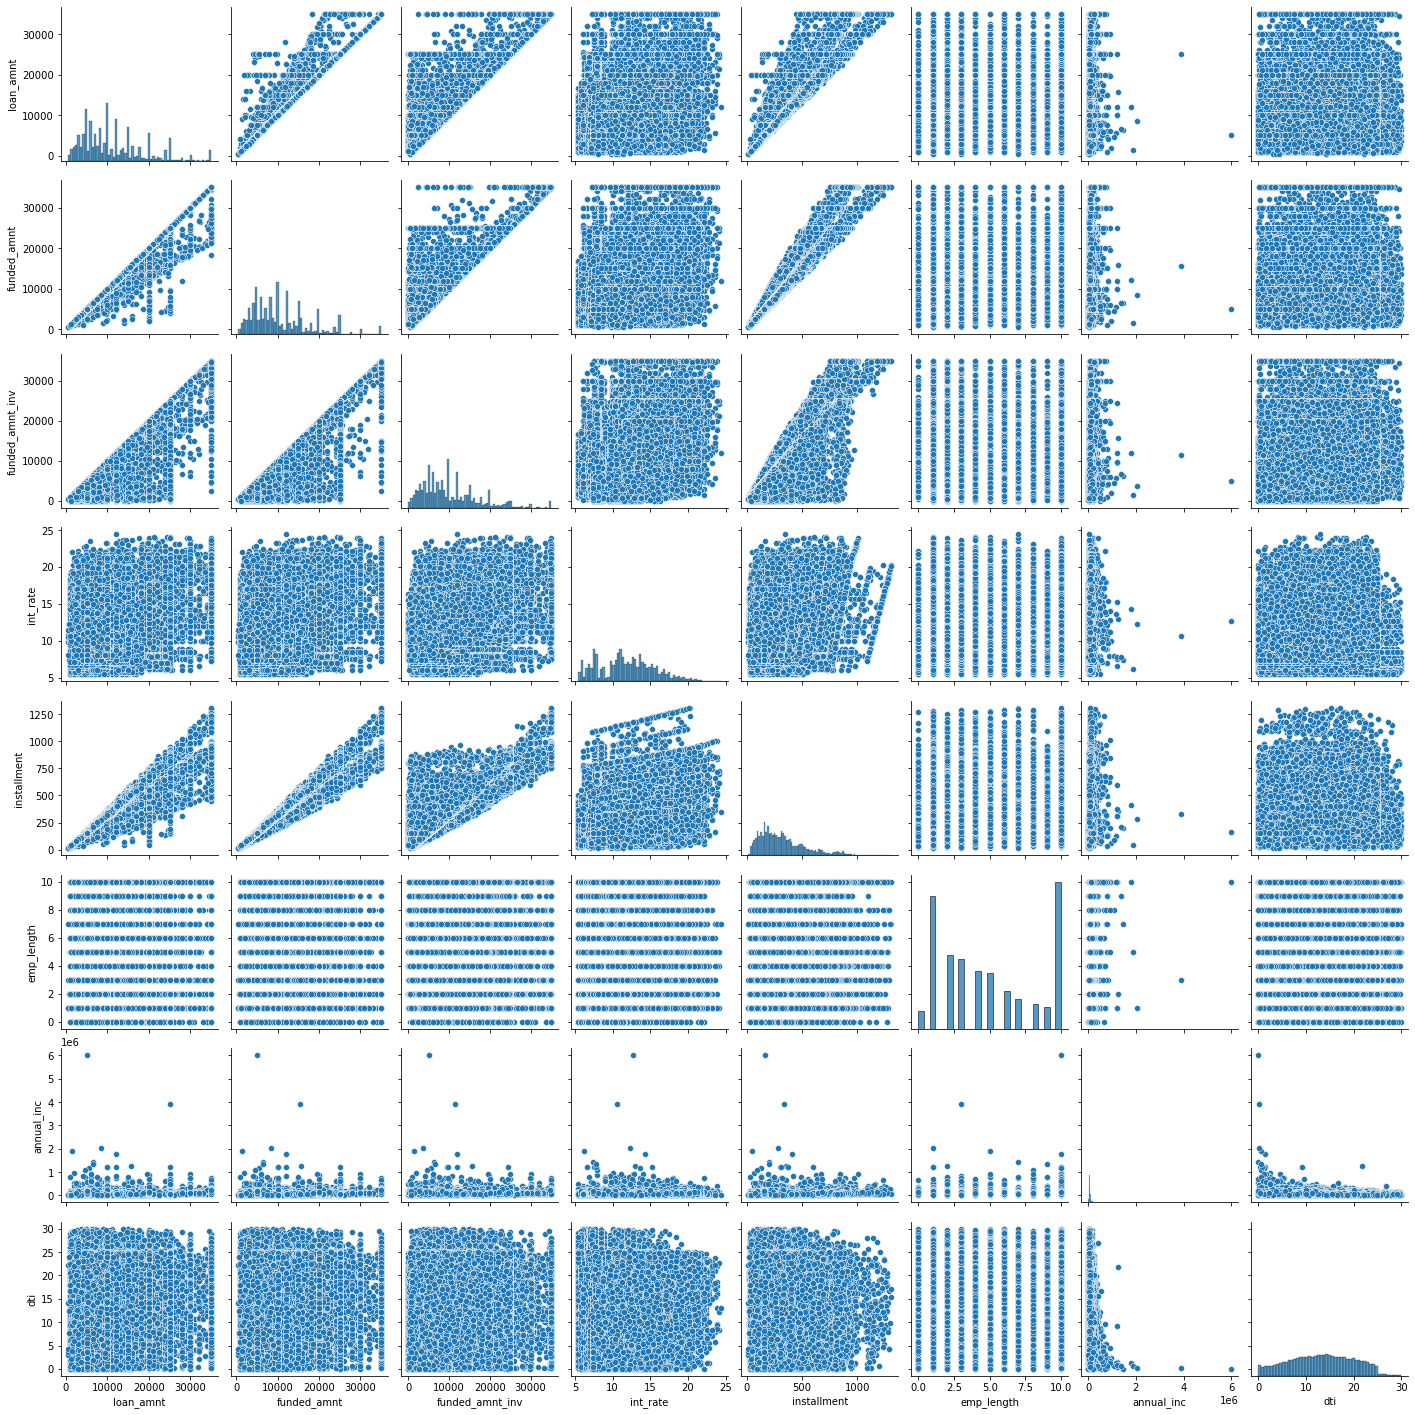

In [25]:
# Pairwise scatter plot
sns.pairplot(loans_1);

#### Insights:
From the table and the pairplot, annual_inc - Annual Income seems to have outliers than other num columns

Confirming the same using box plot

min: 4000.0
max: 6000000.0


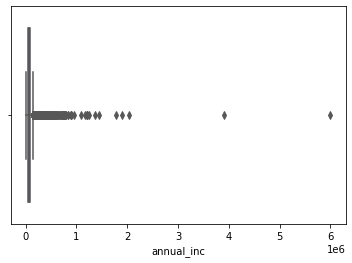

In [26]:
sns.boxplot(loans_1.annual_inc, orient = "h", color = "royalblue");
print ("min:", loans_1.annual_inc.min())
print ("max:", loans_1.annual_inc.max())

IQR method to remove the outliers in annual income 

In [27]:
print(loans_1.shape)
Q1 = loans_1.annual_inc.quantile(0.25)
Q3 = loans_1.annual_inc.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)

# Remove Outliers
loans_1 = loans_1[~((loans_1.annual_inc < (Q1 - 1.5 * IQR)) |(loans_1.annual_inc > (Q3 + 1.5 * IQR)))]
# Check shape again
print(loans_1.shape)

(38577, 18)
IQR:  42000.0
(36815, 18)


Box plt annual income after removal of outliers

min: 4000.0
max: 145000.0


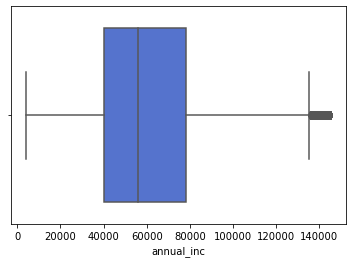

In [28]:
sns.boxplot(loans_1.annual_inc, orient = "h", color = "royalblue");
print ("min:", loans_1.annual_inc.min())
print ("max:", loans_1.annual_inc.max())

In [29]:
print("Shape before cleaning", loans.shape)
print("Shape after cleaning", loans_1.shape)

Shape before cleaning (39717, 111)
Shape after cleaning (36815, 18)


#### Data, Time Formatting

In [30]:
loans_1['issue_d'] = pd.to_datetime(loans_1['issue_d'], format='%b-%y')
loans_1['issue_m'] =  pd.to_datetime(loans_1['issue_d']).dt.month
loans_1['issue_m'].head()

0    12
1    12
2    12
3    12
5    12
Name: issue_m, dtype: int64

#### Visual analysis of the loan_status
after cleaning the data

In [31]:
#labels
lable = loans_1["loan_status"].value_counts().keys().tolist()
#values
value = loans_1["loan_status"].value_counts().values.tolist()

#labels
lable2 = loans["loan_status"].value_counts().keys().tolist()
#values
value2 = loans["loan_status"].value_counts().values.tolist()

trace = go.Pie(labels = lable ,
               values = value ,
               marker = dict(colors =  [ 'green' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )

layout = go.Layout(dict(title = "Loan Status Fully Paid vs Default",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

### Insights:

1. 54 Columns were Null and were dropped
2. 37 columns were irrelevant for the analysis and were dropped
3. 2 columns had more than 50% data missing and were dropped
4. 1140 rows had data of borrowers whose loan is in Current status and were dropped
5. 1762 rows removed for outliers in annual income
6. The Defaulter's/Charged-off % remains @ 14% before and after cleaning data

### **3. Data Content Analysis**

#### Univariant Analysis

- Numerical values analysis
- Categorical values analysis

Listing all the numerical and categorical colums

In [32]:
print ("Numberical:", loan_num_columns)
print ("\nCategorical:", loan_cat_columns)

Numberical: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti']

Categorical: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state']


###### Hist Plot all the Numerical to visualise the distributions

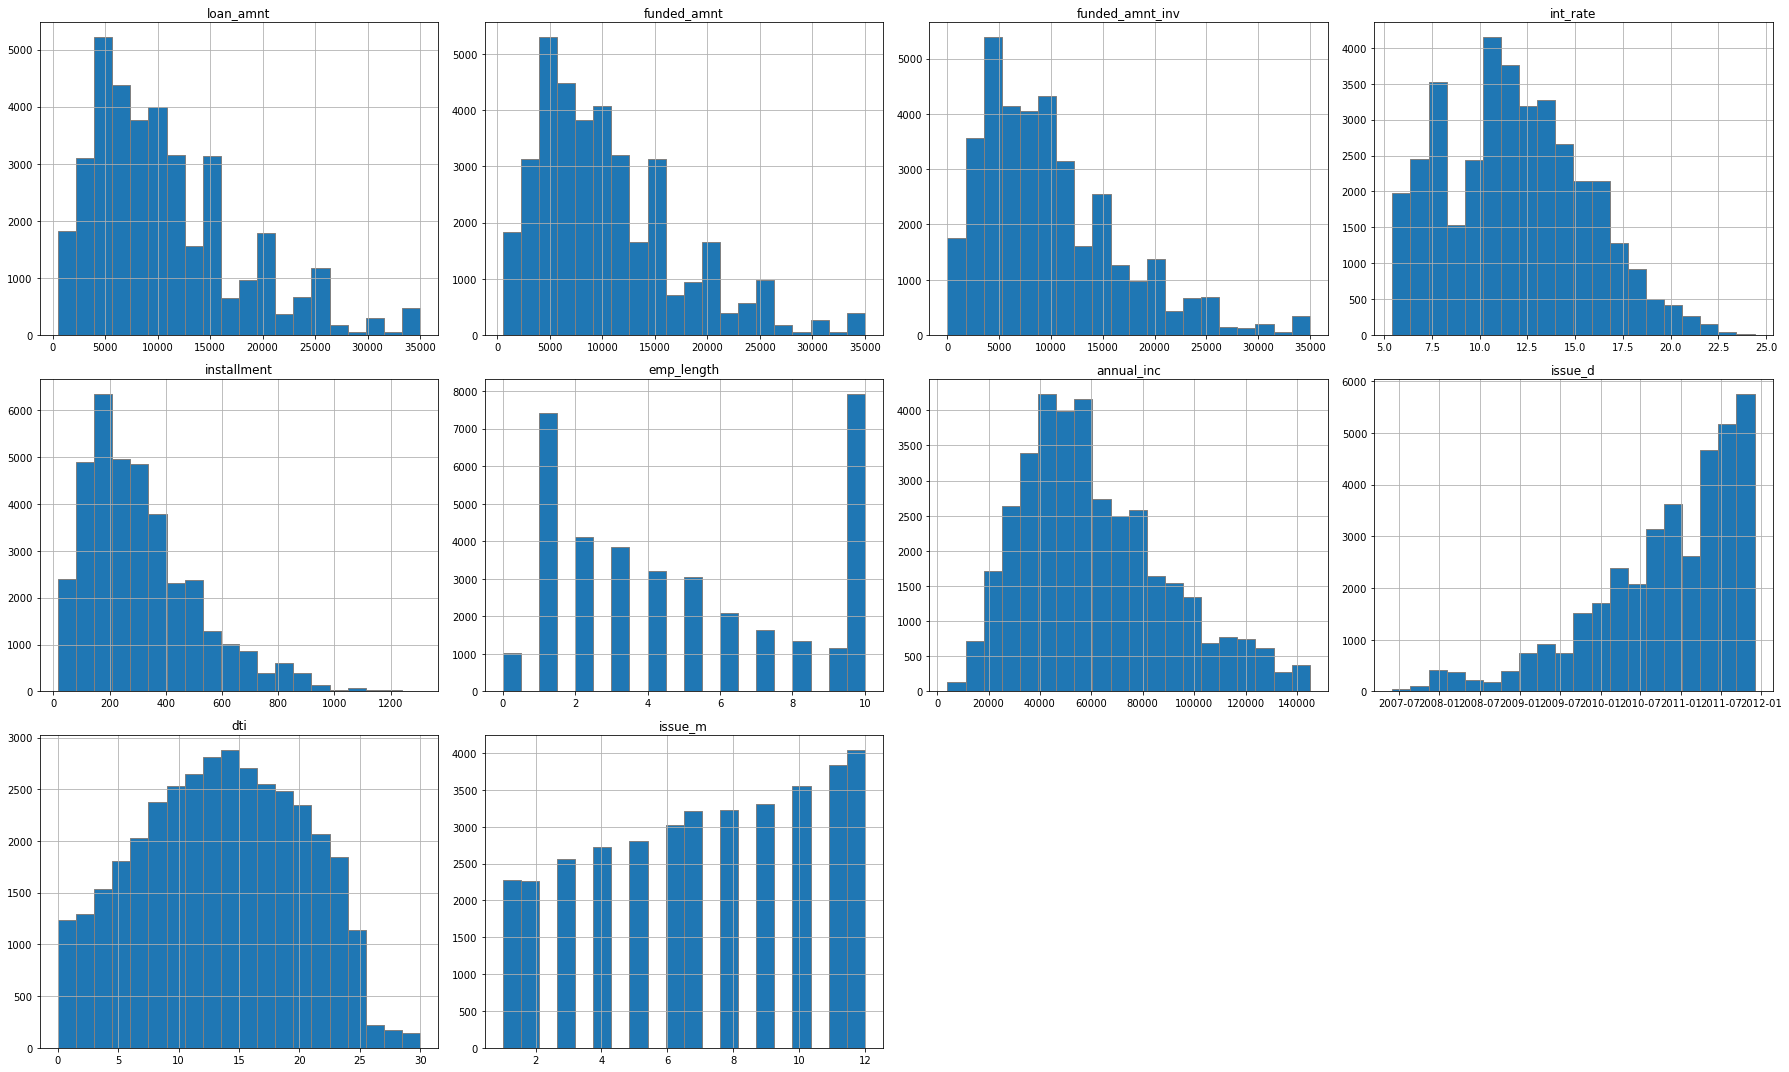

In [33]:
loans_1.hist(bins=20, figsize=(25, 15), layout=(-1, 4), edgecolor="gray")
plt.tight_layout() 

#### Insights
- loan amount, funded amount, fundded amount_inv are almost similar
- Funded amount concentration is high in 5,000 to 10,000
- interest rate normally between 10% to 17.5%
- More borrowers with employment tenure 10 years & above # as we have ceiled 10+ also to 10
- annual income of the borrowers concentration is 40,000 to 80,000
- dti is peaking around 15

#### Understand the correlation of the numerical values

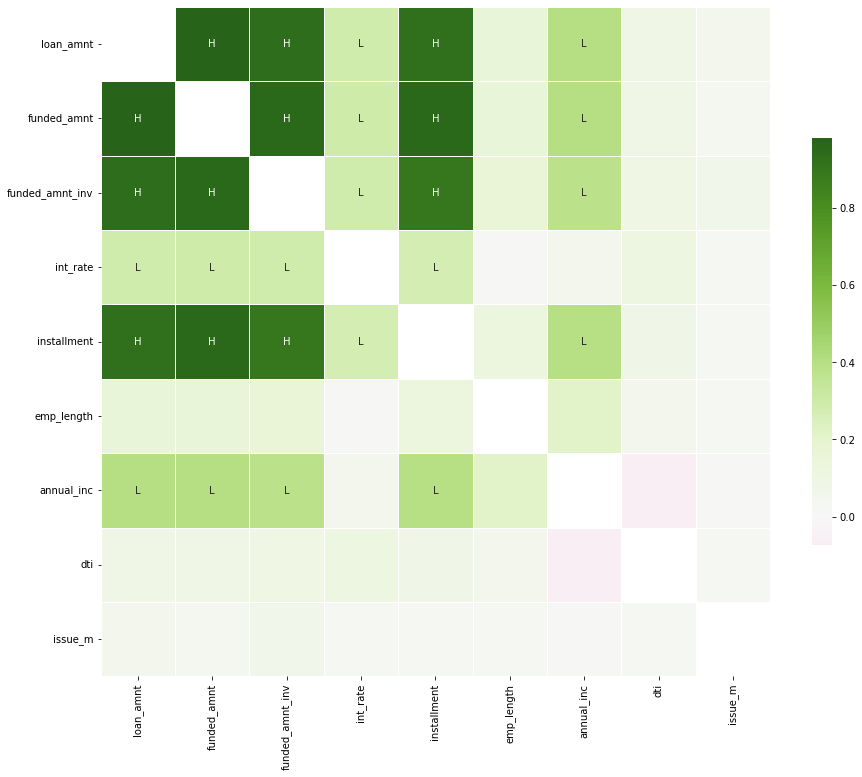

In [34]:
# correlation
loans_corr = loans_1.corr(method="pearson") # Pearson correlation evaluates the linear relationship b/w two variables
# Create labels for the correlation matrix
labels = np.where(np.abs(loans_corr)>0.75, "H",
                  np.where(np.abs(loans_corr)>0.5, "M",
                           np.where(np.abs(loans_corr)>0.25, "L", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(loans_corr, mask=np.eye(len(loans_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="PiYG", cbar_kws={"shrink": 0.5});

#### Insights
Above confirms the previous understanding on loan amount, funded amount, funded amount_inv. They are highly corelated

Loan amout and the installment is also highly corelated for obvious reasons. 

So for further analysis ***loan_amnt*** will be used and ***funded amount, funded amount_inv*** can be skipped, as they are **highly correlated**

###### Visualise the Categorical variables
Categorical: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state']

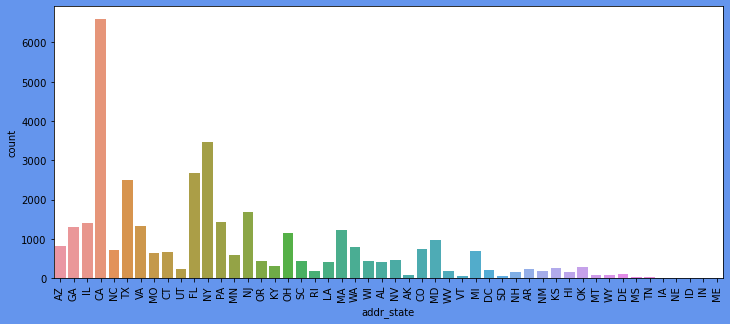

In [35]:
#sns.set(rc={'figure.figsize':(5,5)})
fig, ax1 = plt.subplots(figsize=(12, 5),facecolor='cornflowerblue')
sns.countplot(loans_1.addr_state)
plt.xticks(rotation=90)
plt.show()

**CA** state has more number of borrowers. Any specific reason on this to be identified

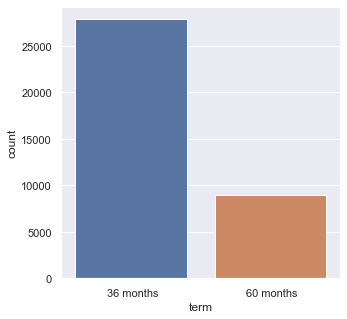

In [36]:
sns.set(rc={'figure.figsize':(5,5)})
fig, ax1 = plt.subplots(figsize=(5, 5))
sns.countplot(loans_1.term)
plt.xticks(rotation=0)
plt.show()

36 months seems to be preferred term

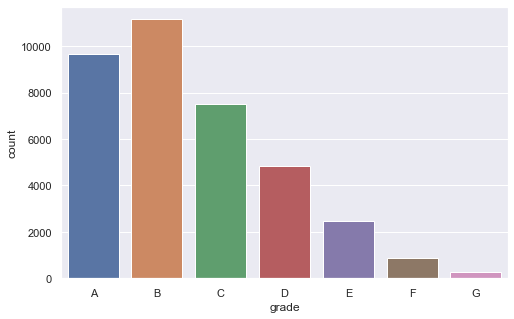

In [37]:
#sns.set(rc={'figure.figsize':(4,6)})
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.countplot(loans_1.grade, order = 'ABCDEFG')
plt.xticks(rotation=0);

Most borrowers are categorised under Grade **B** followed by Grade **A** & **C**

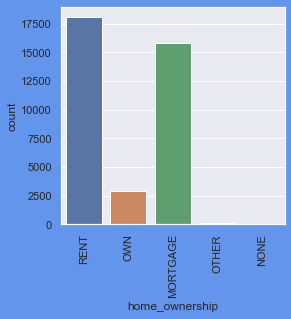

In [38]:
#home_ownership
fig, ax1 = plt.subplots(figsize=(4, 4),facecolor='cornflowerblue')
sns.countplot(loans_1.home_ownership)
plt.xticks(rotation=90);

In [39]:
#verification_status
#labels
lable = loans_1["verification_status"].value_counts().keys().tolist()
#values
value = loans_1["verification_status"].value_counts().values.tolist()

#labels
lable2 = loans["verification_status"].value_counts().keys().tolist()
#values
value2 = loans["verification_status"].value_counts().values.tolist()

trace = go.Pie(labels = lable ,
               values = value ,
               marker = dict(colors =  [ 'red','green','blue'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )

layout = go.Layout(dict(title = "Verification Status",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Many sources are Not verified

#### Suggestion: More Verification has to be done by the lending club

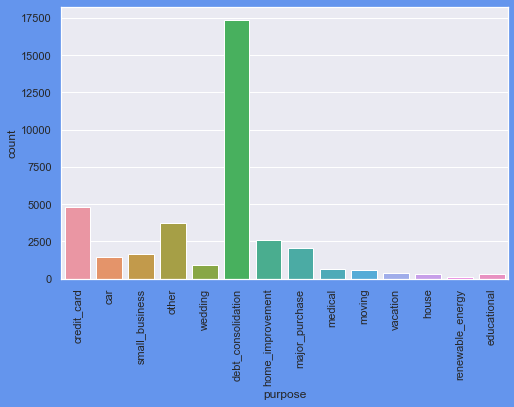

In [40]:
#purpose
#sns.set(rc={'figure.figsize':(8,5)})
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='cornflowerblue')
sns.countplot(loans_1.purpose)
plt.xticks(rotation=90);

**debt consolidation** is one of the major reasons borrowers reach Lending club. Is this a major default category to be identified

********************************************************************************************************************************


## Bivariant Analysis
- Loan status vs issued month
- purpose vs Charged-off Proportion Percent
- state code vs Charged-off Proportion Percent
- grade vs Charge-off Proportion Percent
- sub_grade vs Charge-off Proportion Percent
- Loan Tenure vs Loan Status proprtion
- Interest Rate Influence on Loan Status
- Annual Income vs Loan Status
- Loan Amount vs Loan Status
- Income Verified vs Loan Status
- DTI vs Loan Status
- Term of loan vs Interest Rate


### Loan status vs issued month
Loan Status and the month in which it was issued

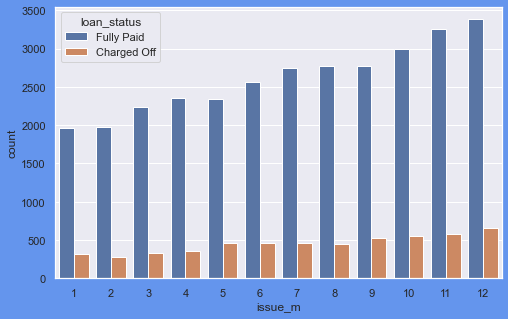

In [41]:
#sns.set(rc={'figure.figsize':(10,8)})
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='cornflowerblue')
sns.countplot(x = loans_1.issue_m, hue = loans_1.loan_status);

### Insights
Issued month has not much influence on the charge off or defaulting

### Loan purpose vs Charged-off Proportion Percent

In [42]:
import matplotlib.colors as mcolors


# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loans_1['loan_amnt_cats'] = pd.cut(loans_1['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loans_1['annual_inc_cats'] = pd.cut(loans_1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loans_1['int_rate_cats'] = pd.cut(loans_1['int_rate'], [0, 10, 15, 20, 25], labels=['0-10', '10-15', '15-20', '20 +'])

# categorise dti into buckets for bivariate analysis.
loans_1['dti_cats'] = pd.cut(loans_1['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '25+'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [43]:
#Loan Purpose vs Charge-off Proportion Percent
#Calculating Chargeoff propotion against total loans against for each of the Loan Purpose mentioned by the Customer

purpose_chargeoff_proportion = loans_1.groupby(['purpose','loan_status'])['loan_status'].count().unstack().reset_index().fillna(0)

purpose_chargeoff_proportion['Total'] = purpose_chargeoff_proportion['Charged Off']+purpose_chargeoff_proportion['Fully Paid']

purpose_chargeoff_proportion['charge_off_per'] = purpose_chargeoff_proportion['Charged Off']/purpose_chargeoff_proportion['Total']*100

purpose_chargeoff_proportion.sort_values('charge_off_per', ascending=False)

loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          454        1175   1629   
10             renewable_energy           18          77     95   
3                   educational           54         259    313   
8                        moving           90         460    550   
9                         other          607        3105   3712   
5                         house           55         283    338   
7                       medical          104         538    642   
2            debt_consolidation         2684       14694  17378   
12                     vacation           52         313    365   
4              home_improvement          322        2262   2584   
0                           car          159        1297   1456   
1                   credit_card          522        4281   4803   
6                major_purchase          217        1837   2054   
13                      wedding           93         803    896   

loan_status  charge_off_per  
11                    27.87  
10                    18.95  
3                     17.25  
8                     16.36  
9                     16.35  
5                     16.27  
7                     16.20  
2                     15.44  
12                    14.25  
4                     12.46  
0                     10.92  
1                     10.87  
6                     10.56  
13                    10.38

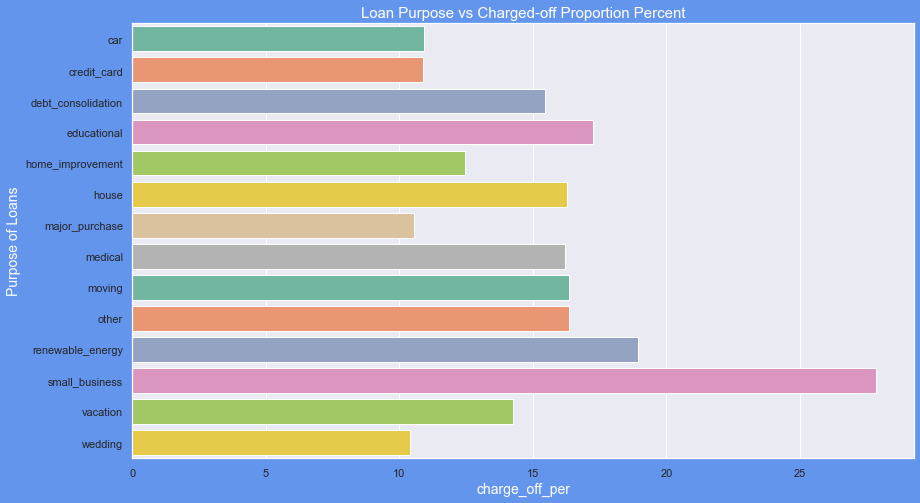

In [44]:
#Plotting the above figures

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='cornflowerblue')

ax1.set_title('Loan Purpose vs Charged-off Proportion Percent',fontsize=15,color = 'w')

ax1=sns.barplot(y='purpose', x='charge_off_per', data=purpose_chargeoff_proportion, palette="Set2")

ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')

ax1.set_xlabel('charge_off_per',fontsize=14,color = 'w')

plt.show()

### Insights

From the above graph we infer that the persons who has taken a loan for **small business** are more prone towards **chargeoff**.

State-wise Loan Taken vs Charge-off Proportion Percent


Calculating Chargeoff propotion against total loans against for each of the customer state

### state code vs Charged-off Proportion Percent

In [45]:
statewise_chargeoff_proportion = loans_1.groupby(['addr_state','loan_status'])['loan_status'].count().unstack().reset_index().fillna(0)

statewise_chargeoff_proportion['Total'] = statewise_chargeoff_proportion['Charged Off']+statewise_chargeoff_proportion['Fully Paid']

statewise_chargeoff_proportion['charge_off_per'] = statewise_chargeoff_proportion['Charged Off']/statewise_chargeoff_proportion['Total']*100

statewise_chargeoff_proportion_order = statewise_chargeoff_proportion.sort_values('charge_off_per', ascending=False)

statewise_chargeoff_proportion_order.head(5).append(statewise_chargeoff_proportion_order.tail(5))

##Displays top5 and botto5 records in descending order

loan_status addr_state  Charged Off  Fully Paid   Total  charge_off_per
28                  NE         3.00        2.00    5.00           60.00
32                  NV       103.00      357.00  460.00           22.39
40                  SD        12.00       50.00   62.00           19.35
0                   AK        13.00       58.00   71.00           18.31
9                   FL       487.00     2180.00 2667.00           18.26
7                   DC        13.00      184.00  197.00            6.60
49                  WY         4.00       76.00   80.00            5.00
21                  ME         0.00        3.00    3.00            0.00
15                  IN         0.00        9.00    9.00            0.00
12                  IA         0.00        5.00    5.00            0.00

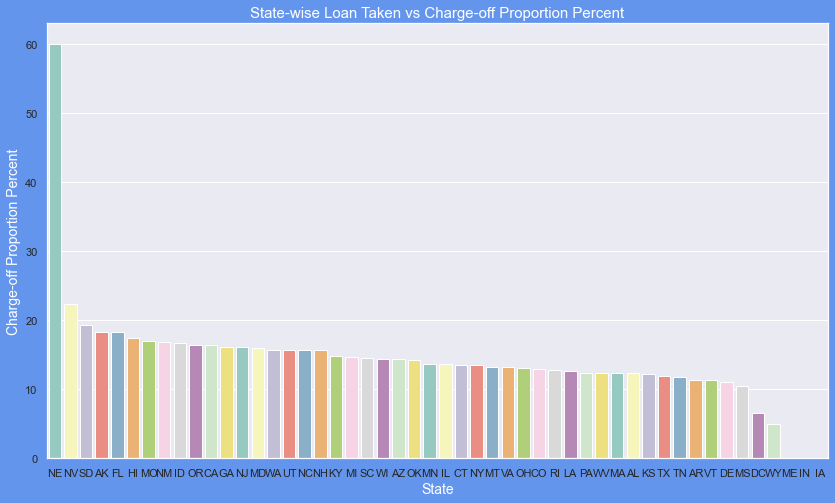

In [46]:
#Plotting the above figures

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='cornflowerblue')
ax1.set_title('State-wise Loan Taken vs Charge-off Proportion Percent',fontsize=15,color = 'w')
ax1=sns.barplot(y='charge_off_per', x='addr_state', data=statewise_chargeoff_proportion_order, palette="Set3")
ax1.set_ylabel('Charge-off Proportion Percent',fontsize=14,color='w')
ax1.set_xlabel('State',fontsize=14,color = 'w')
plt.show()

### Insights
states NE has very high chances of charged off but number of applications are too low to make any decisions.

**NV** & **FL** states shows good number of charged offs in good number of applications.

### grade vs Charge-off Proportion Percent


In [47]:
loan_grd = loans_1.groupby(['grade','loan_status'])['loan_status'].count().unstack().fillna(0)
loan_grd['Total'] = loan_grd['Charged Off']+loan_grd['Fully Paid']
loan_grd['charge_off_Prop'] = loan_grd['Charged Off']/loan_grd['Total']*100
loan_grd['Fully_Paid_Prop'] = loan_grd['Fully Paid']/loan_grd['Total']*100
loan_grd_final = loan_grd.drop(['Charged Off', 'Fully Paid','Total'],axis=1)
loan_grd_final

loan_status  charge_off_Prop  Fully_Paid_Prop
grade                                        
A                       6.12            93.88
B                      12.37            87.63
C                      17.67            82.33
D                      22.30            77.70
E                      26.91            73.09
F                      32.70            67.30
G                      35.96            64.04

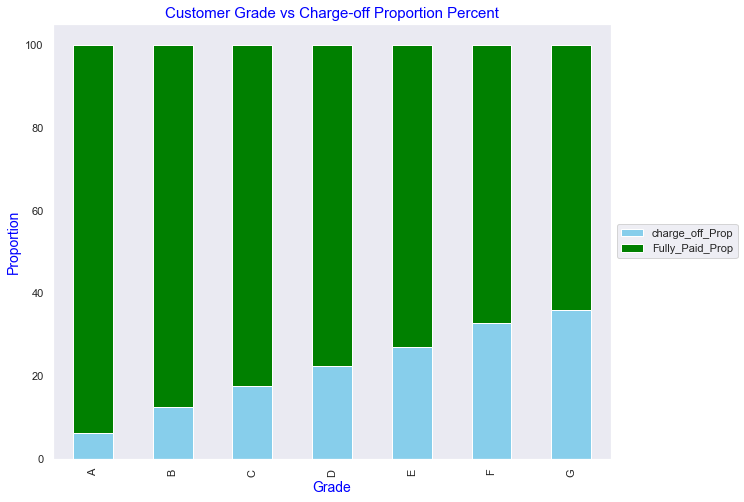

In [48]:
# create stacked bar chart for monthly temperatures
#plt.figure(facecolor='cornflowerblue')
loan_grd_final.plot(kind='bar', stacked=True, color=['skyblue', 'green'], figsize=(10, 8))
plt.title('Customer Grade vs Charge-off Proportion Percent',fontsize=15,color = 'blue')

plt.xlabel("Grade",fontsize=14,color='blue')
plt.ylabel("Proportion",fontsize=14,color='blue')
plt.grid(b=None)

plt.legend(bbox_to_anchor =(1, 0.5),loc='center left')
plt.show()

### Insights
 Customers with **Grade F** & **G** are high risk customers and there are very high chances of charge off
 
 Also there is a gradual increase in charge off proportion when we move from Grade A to G

### sub_grade vs Charge-off Proportion Percent

In [49]:
#Calculating Chargeoff propotion against total loans against for each of the Loan Sub-Grade

sgrade_chargeoff_proportion = loans_1.groupby(['sub_grade','loan_status'])['loan_status'].count().unstack().reset_index().fillna(0)

sgrade_chargeoff_proportion['Total'] = sgrade_chargeoff_proportion['Charged Off']+sgrade_chargeoff_proportion['Fully Paid']

sgrade_chargeoff_proportion['charge_off_per'] = sgrade_chargeoff_proportion['Charged Off']/sgrade_chargeoff_proportion['Total']*100

sgrade_chargeoff_proportions_order = sgrade_chargeoff_proportion.sort_values('charge_off_per', ascending=False)

sgrade_chargeoff_proportions_order.head(5).append(sgrade_chargeoff_proportions_order.tail(5))

loan_status sub_grade  Charged Off  Fully Paid  Total  charge_off_per
29                 F5           52          48    100           52.00
32                 G3           19          22     41           46.34
34                 G5            9          14     23           39.13
31                 G2           26          43     69           37.68
30                 G1           31          58     89           34.83
4                  A5          213        2402   2615            8.15
3                  A4          173        2586   2759            6.27
2                  A3          103        1651   1754            5.87
1                  A2           74        1383   1457            5.08
0                  A1           30        1069   1099            2.73

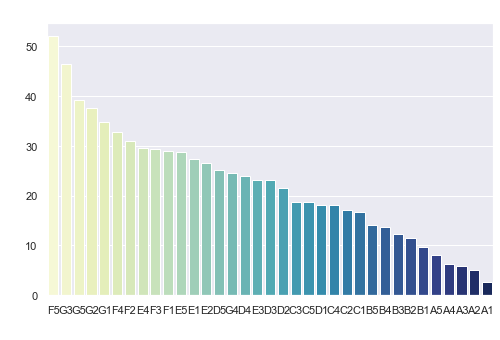

In [50]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_title('Customer Sub_Grade vs Charge-off Proportion Percent',fontsize=15,color = 'w')

ax1=sns.barplot(y='charge_off_per', x='sub_grade', data=sgrade_chargeoff_proportions_order, palette="YlGnBu")

ax1.set_ylabel('Charge-off Proportion',fontsize=14,color='w')

ax1.set_xlabel('Sub_Grade',fontsize=14,color = 'w')

plt.show()

### Insights
Customers with SubGrade **F5** are high risk customers and are prone to default a loan followed by G3,G2

Customers with SubGrade G and F are high risk customers are prone to default.

### Loan Tenure vs Loan Status proprtion

In [51]:
#Calculating Chargeoff and fully paid loans propotion against total for each of the Loan Term

loan_term = loans_1.groupby(['term','loan_status'])['loan_status'].count().unstack().fillna(0)

loan_term['Total'] = loan_term['Charged Off']+loan_term['Fully Paid']

loan_term['charge_off_Prop'] = loan_term['Charged Off']/loan_term['Total']*100

loan_term['Fully_Paid_Prop'] = loan_term['Fully Paid']/loan_term['Total']*100

loan_term_final = loan_term.drop(['Charged Off', 'Fully Paid','Total'],axis=1)

loan_term_final


loan_status  charge_off_Prop  Fully_Paid_Prop
term                                         
 36 months             11.21            88.79
 60 months             25.74            74.26

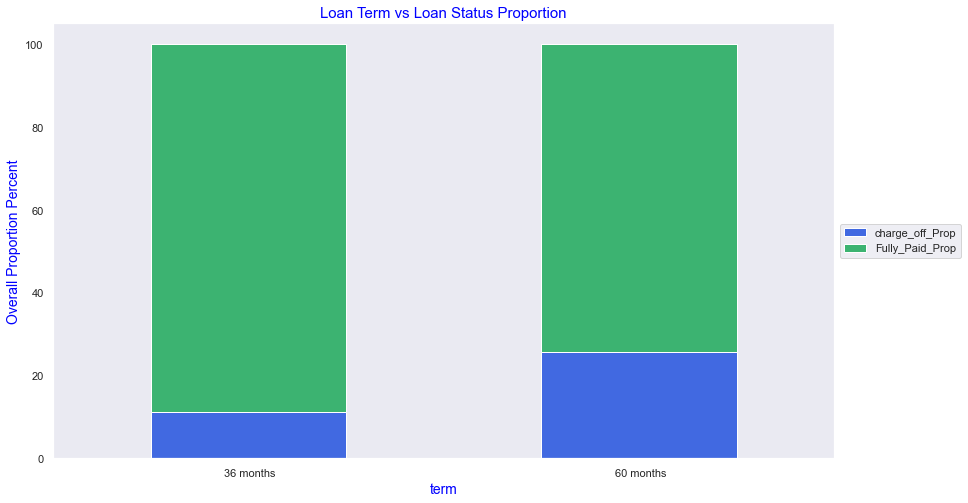

In [52]:
loan_term_final.plot(kind='bar', stacked=True, color=['royalblue', 'mediumseagreen'], figsize=(14, 8))

plt.title('Loan Term vs Loan Status Proportion',fontsize=15,color = 'blue')


 
plt.xlabel("term",fontsize=14,color='blue')
plt.ylabel("Overall Proportion Percent",fontsize=14,color='blue')
plt.grid(b=None)

plt.legend(bbox_to_anchor =(1, 0.5),loc='center left')

plt.xticks(rotation=0);
plt.show()

### Insights

**Long loan** tenure has high Chargeoff rates

### Interest Rate Influence on Loan Status

From the data, we infer that there are many distinct interest rates. Hence to check the influence of interest rates on Loan Status

We are grouping the interest rates. These grouped interest rates are used for our analysis.

In [53]:
interest_vs_loan = loans_1.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion_Per'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']*100
interest_vs_loan.sort_values('Chargedoff_Proportion_Per', ascending=False)

loan_status int_rate_cats  Charged Off  Fully Paid  Total  \
3                    20 +          271         410    681   
2                   15-20         1709        5101   6810   
1                   10-15         2639       14818  17457   
0                    0-10          812       11055  11867   

loan_status  Chargedoff_Proportion_Per  
3                                39.79  
2                                25.10  
1                                15.12  
0                                 6.84

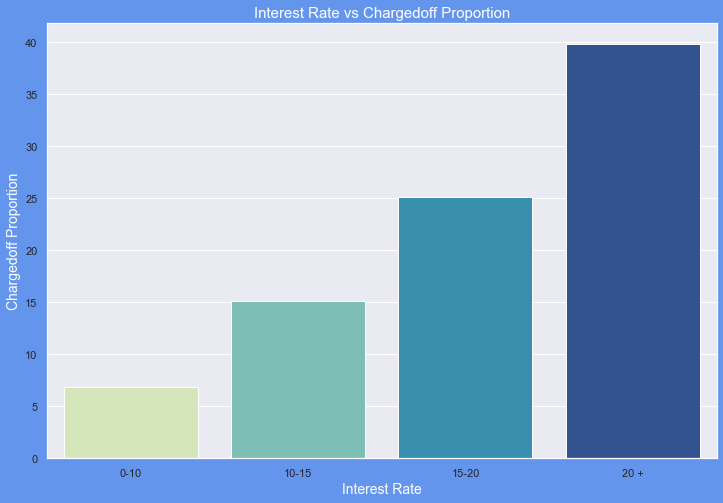

In [54]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='cornflowerblue')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion_Per', data=interest_vs_loan, palette="YlGnBu")
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

plt.show()

### Insights
interest rate less than 10% has very less chances of charged off. Interest rates are starting from minimum 5 %.

interest rate more than **15%** has good chance of charged off as compared to other category intrest rates.

Charged off proportion is increasing with higher intrest rates.

### Annual Income vs Loan Status

In [55]:
inc_range_vs_loan = loans_1.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion_Per'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total'] *100
inc_range_vs_loan.sort_values('Chargedoff_Proportion_Per', ascending=False)

loan_status annual_inc_cats  Charged Off  Fully Paid  Total  \
0                   0-20000          237         943   1180   
1               20000-40000         1514        7004   8518   
2               40000-60000         1729        9534  11263   
3               60000-80000         1024        6597   7621   
4                   80000 +          927        7306   8233   

loan_status  Chargedoff_Proportion_Per  
0                                20.08  
1                                17.77  
2                                15.35  
3                                13.44  
4                                11.26

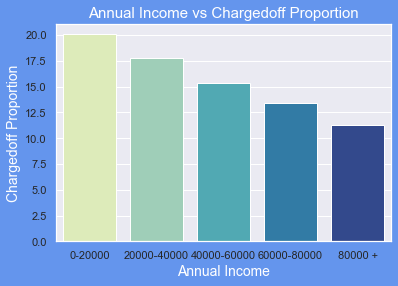

In [56]:
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='cornflowerblue')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion_Per', data=inc_range_vs_loan, palette="YlGnBu")
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')

plt.show()

### Insights
Income range 80,000+  has less chances of charged off

**Income** range **0-20,000** has high chances of charged off

Notice that with increase in annual income charged off proportion got decreased

### Loan Amount vs Loan Status

In [57]:
loanamt_range_vs_loan = loans_1.groupby(['loan_amnt_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loanamt_range_vs_loan['Total'] = loanamt_range_vs_loan['Charged Off'] + loanamt_range_vs_loan['Fully Paid'] 
loanamt_range_vs_loan['Chargedoff_Proportion_Per'] = loanamt_range_vs_loan['Charged Off'] / loanamt_range_vs_loan['Total'] *100
loanamt_range_vs_loan.sort_values('Chargedoff_Proportion_Per', ascending=False)

loan_status loan_amnt_cats  Charged Off  Fully Paid  Total  \
4                  28000 +          224         651    875   
3              21000-28000          484        1918   2402   
2              14000-21000         1111        5483   6594   
1               7000-14000         1746       11116  12862   
0                   0-7000         1866       12216  14082   

loan_status  Chargedoff_Proportion_Per  
4                                25.60  
3                                20.15  
2                                16.85  
1                                13.57  
0                                13.25

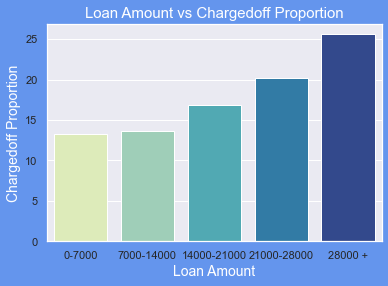

In [58]:
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='cornflowerblue')
ax1.set_title('Loan Amount vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='loan_amnt_cats', y='Chargedoff_Proportion_Per', data=loanamt_range_vs_loan, palette="YlGnBu")
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Loan Amount',fontsize=14,color='w')

plt.show()

### Insights
Higher Loan amount has more chances of charged off

**Loan amount** having **28000+$** has high chances of charged off

### Income Verified vs Loan Status

In [59]:
verfy_vs_loan = loans_1.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion_per'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total'] * 100
verfy_vs_loan.sort_values('Chargedoff_Proportion_per', ascending=False)

loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         1957        9343  11300   
1               Source Verified         1375        7820   9195   
0                  Not Verified         2099       14221  16320   

loan_status  Chargedoff_Proportion_per  
2                                17.32  
1                                14.95  
0                                12.86

### Insights
There is not much difference in charged off proportion

This variable doesn't provide any insights for charged off

In [60]:
dti_range_vs_loan = loans_1.groupby(['dti_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_range_vs_loan['Total'] = dti_range_vs_loan['Charged Off'] + dti_range_vs_loan['Fully Paid']
dti_range_vs_loan['Chargedoff_Proportion_Per'] = dti_range_vs_loan['Charged Off'] / dti_range_vs_loan['Total'] *100
dti_range_vs_loan.sort_values('Chargedoff_Proportion_Per', ascending=False)

loan_status dti_cats  Charged Off  Fully Paid  Total  \
4                25+         1104        5368   6472   
3              15-20         1348        7210   8558   
2              10-15         1355        7859   9214   
1               5-10          947        6358   7305   
0                0-5          562        3917   4479   

loan_status  Chargedoff_Proportion_Per  
4                                17.06  
3                                15.75  
2                                14.71  
1                                12.96  
0                                12.55

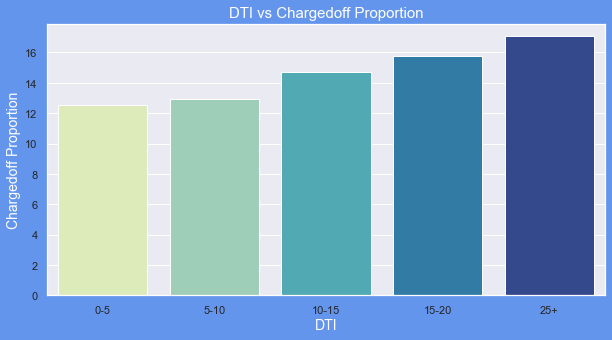

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='cornflowerblue')
ax1.set_title('DTI vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='dti_cats', y='Chargedoff_Proportion_Per', data=dti_range_vs_loan, palette="YlGnBu")
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('DTI',fontsize=14,color='w')

plt.show()

### Insights
The DTI is directly proportional to the Charge off. The more debt to income, the more chance of Defaulting.

### Term of loan vs Interest Rate

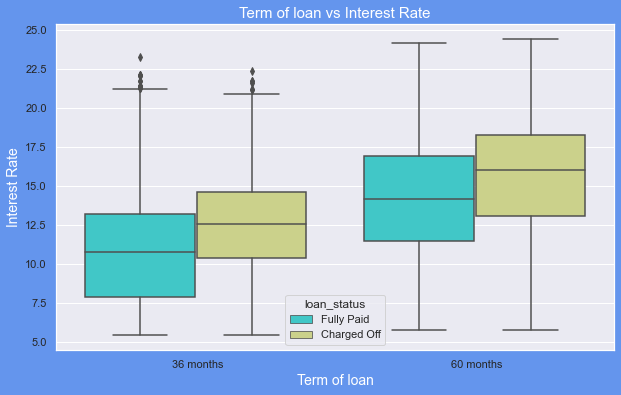

In [62]:
plt.figure(figsize=(10,6),facecolor='cornflowerblue')
ax = sns.boxplot(y='int_rate', x='term', data =loans_1,palette='rainbow', hue = 'loan_status')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

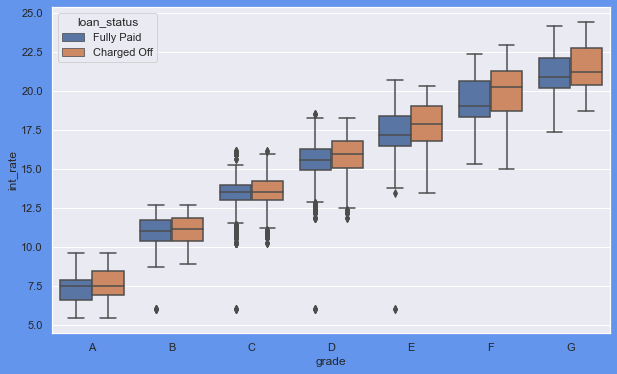

In [63]:
plt.figure(figsize=(10,6),facecolor='cornflowerblue')
sns.boxplot(y='int_rate', x='grade', hue = 'loan_status', data =loans_1, order = 'ABCDEFG');

### Insights
It is clear that median interest rate is higher for 60 months loan term and grades like F & G 

Most of the loans issued for longer term had higher interest rates and hence has high chances of default.

### Home Ownership vs Default

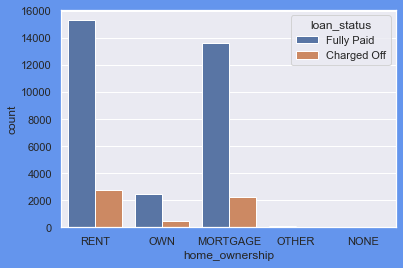

In [64]:
#home_ownership
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='cornflowerblue')
sns.countplot(x = 'home_ownership', hue ='loan_status', data =loans_1);

### Insights
No much inference with home_ownership

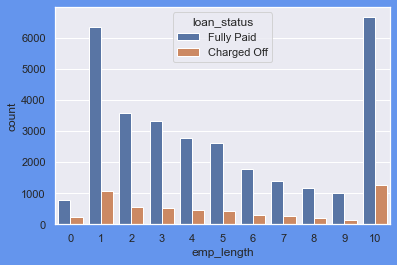

In [65]:
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='cornflowerblue')
sns.countplot(x= 'emp_length', hue = 'loan_status', data = loans_1);

### Insights
No much inference with emp_length

## **4. Summary**

- There were 111 columns and many columns with Null values, redundant values and have been removed for analysis. 
- There were categorical types and few have been type casted to required format for analysis.
- Outlier was treated using IQR method on annual_inc (annual income) has been done. 
- Formatting of Data and time on issue_d

- No missing values were found in the Target variable **loan_status**

- Data Dictionary was used for the variable meaning. So no separate renaming of variables was done.
	
loan_amnt, funded amount and fundded amount_inv are highly correlated. So loan_amnt was used for the analysis

Below are the key insights from the EDA:
1. Persons who has taken loan for small business are more prone towards chargeoff/default.
2. NV & FL states shows good number of charged offs/defaulters in good number of applications
3. Customers with Grade F & G are high risk customers and there are very high chances of charge off
4. Customers with SubGrade F5 are high risk customers and are prone to default a loan followed by G3,G2
	Customers with SubGrade G and F are high risk customers are prone to default.
5. Longer the loan tenure higher the chance of Charge-off/default
6. Interest rate more than 15% has good chance of charged off
7. Income range 0-20,000 has high chances of charged off
8. Loan amount having 28000+$ has high chances of charged off
9. The DTI is directly proportional to the Charge off. The more debt to income, the more chance of Defaulting.

## **5. Conclusion**

Below are the strong indicators of Charge off or defaulting based on the EDA on the dataset provided:

    1. 'purpose' of the loan 
        - loans procured for "small business" are more prone towards chargeoff/default
    2. 'int_rate' interest rate
        - loans with higher interest rate in combination with 'grade' like F & G (or)
        - loans with higher interest rate in combination longer duration of term
        are likely to default
    3. 'grade' Grading of the borrower
        - Customers with Grade F & G are high risk customers and there are very high chances of charge off
    4. 'dti' Debt to Income
        - Debt to Income ratio is directly proporsational to the Charged off or default
    5. 'addr_state' State
        - People from geographical regions state: NV & FL are likely to default more

## Reference

The below section has plots & tables that are used in the PPT. This section is only for reference and not meant for any conclusion of the EDA. 

For the Analysis and Conclusion of the EDA refer the above sections

#### Word Cloud

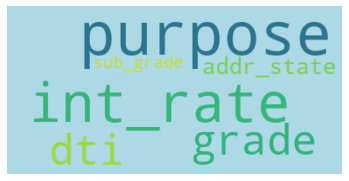

In [69]:
%matplotlib inline

from wordcloud import WordCloud

#Importing Dataset

#df = pd.read_csv("1.csv")

#Checking the Data

loans_1.head()

#Creating the text variable

text1 = "purpose purpose purpose purpose purpose purpose int_rate int_rate int_rate int_rate int_rate grade grade grade grade sub_grade dti addr_state sub_grade dti dti dti addr_state addr_state addr_state "
#text2 = " ".join(title for title in loan_num_columns)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'lightblue').generate(text1)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

#### Numerical Variables Summary

In [67]:
summary = (loans_1[[i for i in loans_1.columns if i not in loans_1.loan_status]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Loan Numerical Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

#### Dataset overview

In [68]:
loans_1.head(3).append(loans_1.tail(3))

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000          4975.00   36 months     10.65   
1           2500         2500          2500.00   60 months     15.27   
2           2400         2400          2400.00   36 months     15.96   
39713       8500         8500           875.00   36 months     10.28   
39714       5000         5000          1325.00   36 months      8.07   
39716       7500         7500           800.00   36 months     13.75   

       installment grade sub_grade  emp_length home_ownership  ...  \
0           162.87     B        B2          10           RENT  ...   
1            59.83     C        C4           1           RENT  ...   
2            84.33     C        C5          10           RENT  ...   
39713       275.38     C        C1           3           RENT  ...   
39714       156.84     A        A4           1       MORTGAGE  ...   
39716       255.43     E        E2           1            OWN  ...   

       loan_status             purpose zip_code addr_state   dti issue_m  \
0       Fully Paid         credit_card    860xx         AZ 27.65      12   
1      Charged Off                 car    309xx         GA  1.00      12   
2       Fully Paid      small_business    606xx         IL  8.72      12   
39713   Fully Paid         credit_card    274xx         NC  6.40       7   
39714   Fully Paid  debt_consolidation    017xx         MA  2.30       7   
39716   Fully Paid  debt_consolidation    027xx         MA 14.29       6   

      loan_amnt_cats  annual_inc_cats  int_rate_cats dti_cats  
0             0-7000      20000-40000          10-15      NaN  
1             0-7000      20000-40000          15-20      0-5  
2             0-7000          0-20000          15-20     5-10  
39713     7000-14000          0-20000          10-15     5-10  
39714         0-7000          80000 +           0-10      0-5  
39716     7000-14000      20000-40000          10-15    10-15  

[6 rows x 23 columns]